### 1. Importing data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
# importing files
path = r'C:\Users\nicol\Instacart Basket Analysis'

In [3]:
df_ords_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_left.pkl'))

In [4]:
df_ords_customers.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,mean_expenses,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,9.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,9.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,9.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,9.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,9.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [5]:
df_ords_customers.shape

(32434212, 34)

### 2. Security implications

This data set contains Personally Identifiable Information (PII) for example: first name and last name of customers.

### 3. Customer behavior in different geographic areas.

#### 3.1 Create regions

In [6]:
# Creating regions

result = []

for value in df_ords_customers['state']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
                 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota' , 'South Dakota', 'Nebraska', 
                   'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
                   'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')
    else:
        result.append('Unknown')

In [7]:
# Create a new column 'region' within the dataframe and set it equal to result
df_ords_customers['region'] = result

In [8]:
# Check the frequency of each region (and compare the sum of them with the total frequency)
df_ords_customers['region'].value_counts()

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [9]:
# check whether new column are assigned
df_ords_customers[['user_id', 'spending_flag', 'state', 'region']].head(25)

,user_id,spending_flag,state,region
0,1,Low spender,Alabama,South
1,1,Low spender,Alabama,South
2,1,Low spender,Alabama,South
3,1,Low spender,Alabama,South
4,1,Low spender,Alabama,South
5,1,Low spender,Alabama,South
6,1,Low spender,Alabama,South
7,1,Low spender,Alabama,South
8,1,Low spender,Alabama,South
9,1,Low spender,Alabama,South


In [10]:
# Checking the numbers add up to the total number of records in the data frame
10801610 + 8300445 + 7603810 + 5728347

32434212

#### 3.2 Comparing spending habits in each region

In [11]:
# Creating new pivot table for 'Region' and 'spending_flag'

df_region_spending = df_ords_customers.pivot_table(index='region', columns='spending_flag', values='order_number', aggfunc='count', fill_value=0)

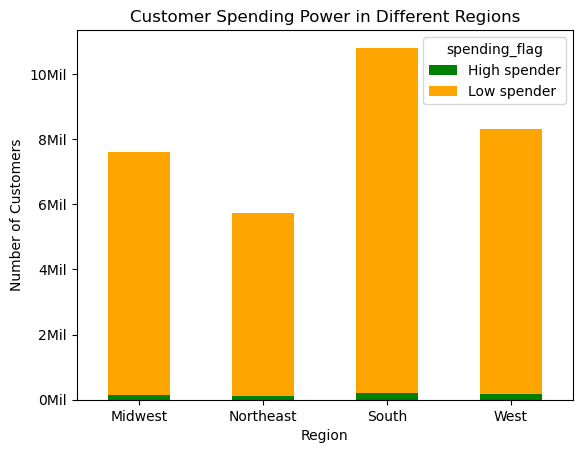

In [12]:
# Plot the data using a bar chart
colors = ['green', 'orange']
bar_region_spending = df_region_spending.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Customer Spending Power in Different Regions')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
bar_region_spending.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))
plt.show()

In [13]:
# Export the chart image
bar_region_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spending.png'))

##### Observation:
The bar charts demonstrates the customer spending power was very similar among all four regions. The amount of low spenders was more than that of high spenders; and the proportion of high spender in each region was very low.

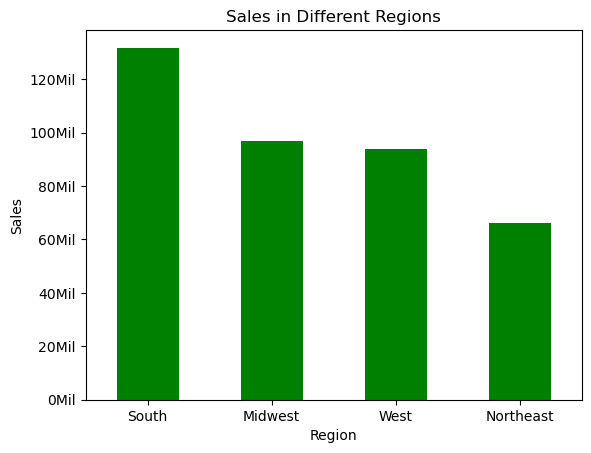

In [14]:
bar_sales_region = df_ords_customers.groupby('region')['prices'].sum().sort_values(ascending=False).plot.bar(title = 'Sales in Different Regions', xlabel = 'Region', ylabel = 'Sales', color = 'green')
plt.xticks(rotation = 0)
bar_sales_region.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))

In [15]:
# Export the chart image
bar_sales_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_region.png'))

### 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [16]:
# Create a new column with max_order
df_ords_customers['max_order'] = df_ords_customers.groupby(['user_id'])['order_number'].transform('max')

In [17]:
# Create the flag based on the criteria
df_ords_customers.loc[df_ords_customers['max_order'] < 5, 'low_activity'] = 'True'
df_ords_customers.loc[df_ords_customers['max_order'] >= 5, 'low_activity'] = 'False'

C:\Users\nicol\AppData\Local\Temp\ipykernel_2764\1886960317.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ords_customers.loc[df_ords_customers['max_order'] < 5, 'low_activity'] = 'True'


In [18]:
df_ords_customers['low_activity'].value_counts()

low_activity
False    30992664
True      1441548
Name: count, dtype: int64

In [19]:
# Create a new data set which only contains active customers (orders >= 5)
df_ords_customers_active = df_ords_customers[df_ords_customers['low_activity'] == 'False']

In [20]:
df_ords_customers_active.shape

(30992664, 36)

In [21]:
# Export the new dataset with only active customers
df_ords_customers_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_customers_active.pkl'))

### 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

#### 5.1. distribution among users in regards to their brand loyalty

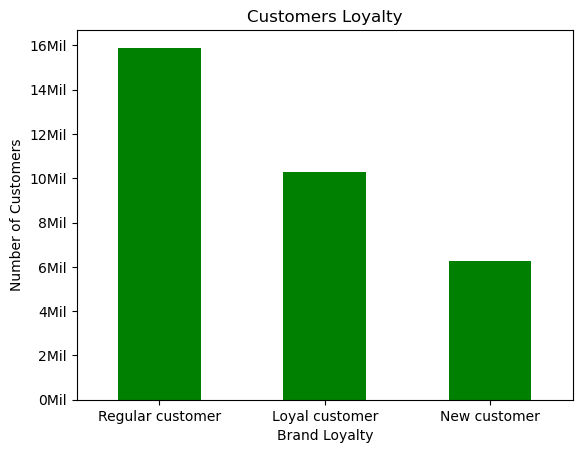

In [22]:
# Create a bar chart showing the number of orders regarding their brand loyalty
bar_orders_loyalty = df_ords_customers['loyalty_flag'].value_counts().plot.bar(title = 'Customers Loyalty', xlabel = 'Brand Loyalty', ylabel = 'Number of Customers', color = 'green')
plt.xticks(rotation=0)
bar_orders_loyalty.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))

In [23]:
# Export the chart image
bar_orders_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyalty.png'))

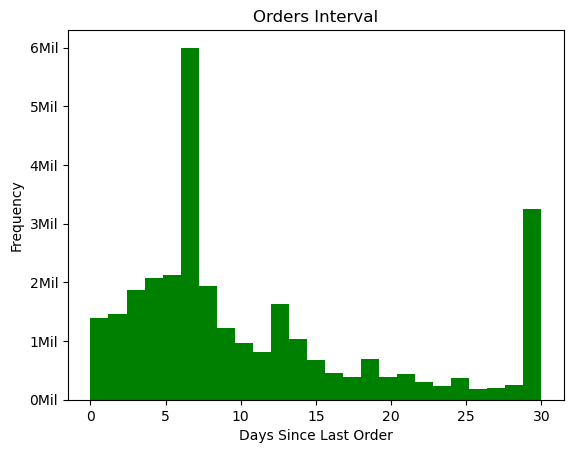

In [24]:
# Create a histogram to check how often do our customers return to Instacart?
hist_orders_interval = df_ords_customers['days_since_last_order'].plot.hist(bins = 25, title = 'Orders Interval', xlabel = 'Days Since Last Order', color = 'green')
hist_orders_interval.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))

In [25]:
# Export the chart image
hist_orders_interval.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_interval.png'))

#### 5.2: Are there differences in ordering habits based on a customer’s loyalty status?

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

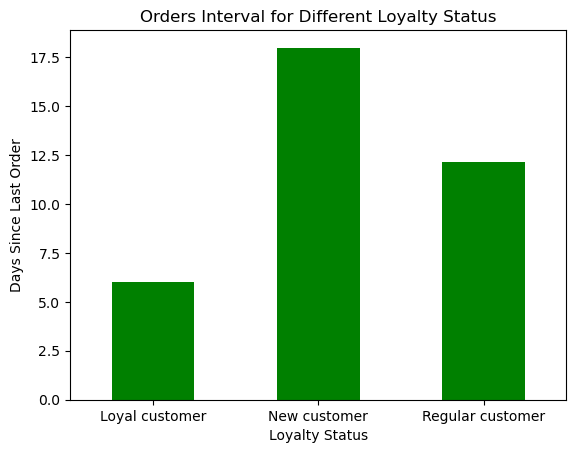

In [26]:
bar_orders_interval_loyalty = df_ords_customers.groupby('loyalty_flag')['days_since_last_order'].mean().plot.bar(title = 'Orders Interval for Different Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Days Since Last Order', color = 'green')
plt.xticks(rotation=0)

In [27]:
# Export the chart outside of Jupyter in the form of image file
bar_orders_interval_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_interval_loyalty.png'))

#### Ordering habit in price of orders

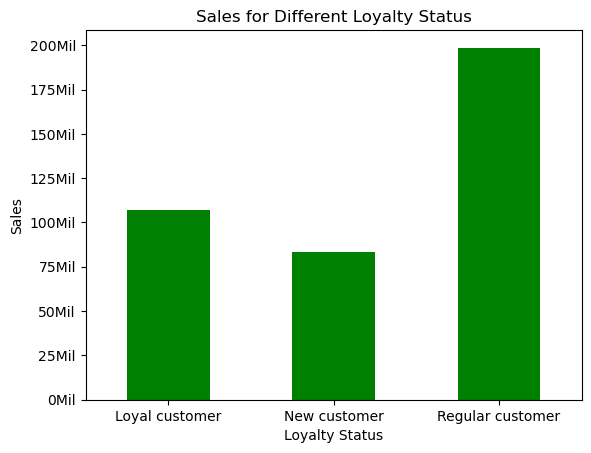

In [28]:
bar_sales_loyalty = df_ords_customers.groupby('loyalty_flag')['prices'].sum().plot.bar(title = 'Sales for Different Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Sales', color = 'green')
plt.xticks(rotation=0)
bar_sales_loyalty.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))

In [29]:
# Export the chart image
bar_sales_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_loyalty.png'))

#### Ordering habit in which days with the most orders

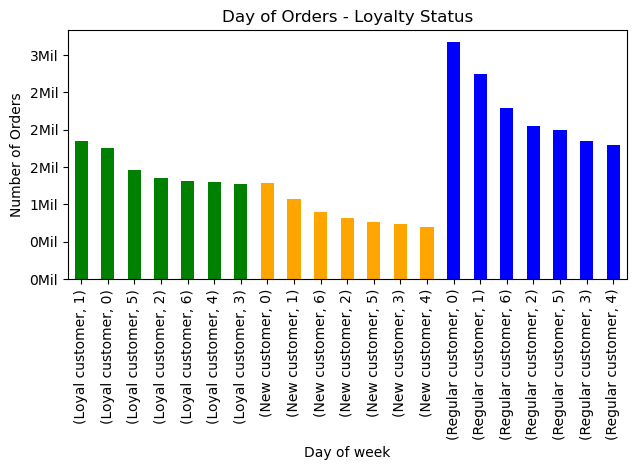

In [30]:
bar_dow_loyalty = df_ords_customers.groupby('loyalty_flag')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders - Loyalty Status', xlabel = 'Day of week', ylabel = 'Number of Orders', color = ['green','green','green','green','green','green','green', 'orange','orange','orange','orange','orange','orange','orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.tight_layout()
bar_dow_loyalty.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))

In [31]:
df_ords_customers.groupby('loyalty_flag')['orders_day_of_week'].value_counts()

loyalty_flag      orders_day_of_week
Loyal customer    1                     1845387
                  0                     1756216
                  5                     1458107
                  2                     1353644
                  6                     1319477
                  4                     1293242
                  3                     1267664
New customer      0                     1281580
                  1                     1068423
                  6                      896507
                  2                      815130
                  5                      760345
                  3                      732075
                  4                      695338
Regular customer  0                     3171836
                  1                     2752020
                  6                     2284262
                  2                     2048992
                  5                     1990997
                  3                     1844357
   

In [32]:
# Export the chart image
bar_dow_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_loyalty.png'))

#### Ordering habit in which time of the day had more orders

In [33]:
# Create a dataframe of order_hour_of_day of different loyalty customers
df_oh_loyalty = df_ords_customers.groupby('loyalty_flag')['order_hour_of_day'].value_counts()

In [34]:
# Check the top 3 ordering hours of New customer
df_oh_loyalty['New customer'].head(3)

order_hour_of_day
15    540901
13    531953
14    531638
Name: count, dtype: int64

In [35]:
# Check the top 3 ordering hours of Regular customer
df_oh_loyalty['Regular customer'].head(3)

order_hour_of_day
11    1340313
10    1330939
14    1324011
Name: count, dtype: int64

In [36]:
# Check the top 3 ordering hours of Loyal customer
df_oh_loyalty['Loyal customer'].head(3)

order_hour_of_day
10    938581
9     883711
11    873880
Name: count, dtype: int64

#### Ordering habit in which dept had the highest orders

In [37]:
# Create a column called 'result' to indicate department name
result = []

for value in df_ords_customers["department_id"]:
    if value == 1:
        result.append("frozen")
    elif value == 2:
        result.append("other")
    elif value == 3:
        result.append("bakery")
    elif value == 4:
        result.append("produce")
    elif value == 5:
        result.append("alchol")
    elif value == 6:
        result.append("international")
    elif value == 7:
        result.append("beverages")
    elif value == 8:
        result.append("pets")
    elif value == 9:
        result.append("dry goods pasta")
    elif value == 10:
        result.append("bulk")
    elif value == 11:
        result.append("personal care")
    elif value == 12:
        result.append("meat seafood")
    elif value == 13:
        result.append("pantry")
    elif value == 14:
        result.append("breakfast")
    elif value == 15:
        result.append("canned goods")
    elif value == 16:
        result.append("dairy eggs")
    elif value == 17:
        result.append("household")   
    elif value == 18:
        result.append("babies")
    elif value == 19:
        result.append("snacks")
    elif value == 20:
        result.append("deli")
    else:
        result.append("missing")

In [38]:
df_ords_customers['department_name'] = result

In [39]:
df_ords_customers['department_name'].value_counts(dropna = False)

department_name
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2688159
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           710647
meat seafood        708931
personal care       447691
babies              423802
international       269253
alchol              153743
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [40]:
df_ords_customers['department_id'].value_counts(dropna = False)

department_id
4     9479291
16    5414016
19    2887550
7     2688159
1     2236432
13    1875577
3     1176787
15    1068058
20    1051249
9      866627
17     738666
14     710647
12     708931
11     447691
18     423802
6      269253
5      153743
8       97724
21      69145
2       36291
10      34573
Name: count, dtype: int64

In [41]:
# Create a dataframe to group the data by 'department_name' and 'loyalty_flag'
df_grouped_dep_loyal =df_ords_customers.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [42]:
df_grouped_dep_loyal.head()

loyalty_flag,Loyal customer,New customer,Regular customer
department_name,,,
alchol,38726,37716,77301
babies,167108,60118,196576
bakery,381686,224397,570704
beverages,855024,512883,1320252
breakfast,223866,139909,346872


In [43]:
df_grouped_dep_loyal_sort = df_grouped_dep_loyal.sort_values(by = 'Regular customer', ascending = False)

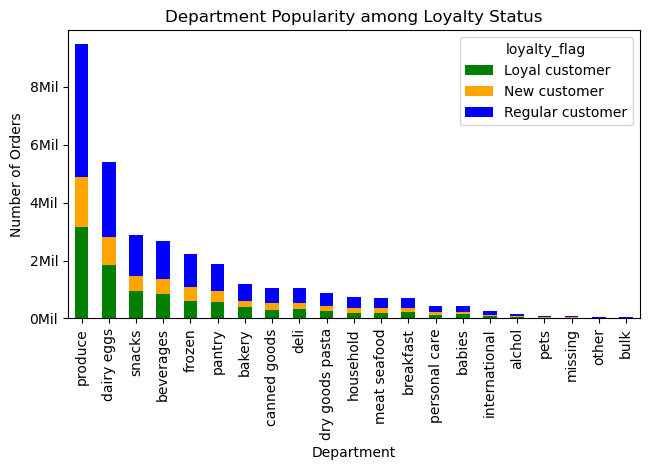

In [44]:
# Plot the data using a bar chart
colors = ['green', 'orange', 'blue']
bar_dep_loyalty = df_grouped_dep_loyal_sort.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity among Loyalty Status')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
bar_dep_loyalty.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))
plt.show()

In [45]:
# Export the chart image
bar_dep_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_loyalty.png'))

In [46]:
df_oh_dep_loyalty = df_ords_customers.groupby('loyalty_flag')['department_name'].value_counts()

In [47]:
# Check top 3 sold departments of each loyalty status
df_oh_dep_loyalty['New customer'].head(3)

department_name
produce       1736622
dairy eggs     974289
snacks         534251
Name: count, dtype: int64

In [48]:
df_oh_dep_loyalty['Regular customer'].head(3)

department_name
produce       4595293
dairy eggs    2604051
snacks        1410149
Name: count, dtype: int64

In [49]:
df_oh_dep_loyalty['Loyal customer'].head(3)

department_name
produce       3147376
dairy eggs    1835676
snacks         943150
Name: count, dtype: int64

#### 5.3 Are there differences in ordering habits based on a customer’s region?

In [50]:
# Ordering habits in days since last order by region
df_ords_customers.groupby('region')['days_since_last_order'].mean()

region
Midwest      11.181993
Northeast    11.076055
South        11.108240
West         11.047007
Name: days_since_last_order, dtype: float64

In [51]:
# Ordering habits in prices by region
df_ords_customers.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.715744  1.0  99999.0
Northeast  11.556398  1.0  99999.0
South      12.196270  1.0  99999.0
West       11.321374  1.0  99999.0

#### Ordering habit by which day had the most order by region

In [52]:
df_ords_customers.groupby('region')['orders_day_of_week'].value_counts()

region     orders_day_of_week
Midwest    0                     1461356
           1                     1322079
           6                     1058902
           2                      992673
           5                      984001
           3                      895896
           4                      888903
Northeast  0                     1098361
           1                     1000935
           6                      787995
           5                      747209
           2                      746892
           3                      679977
           4                      666978
South      0                     2054551
           1                     1893905
           6                     1498091
           2                     1405940
           5                     1401009
           3                     1288493
           4                     1259621
West       0                     1595364
           1                     1448911
           6               

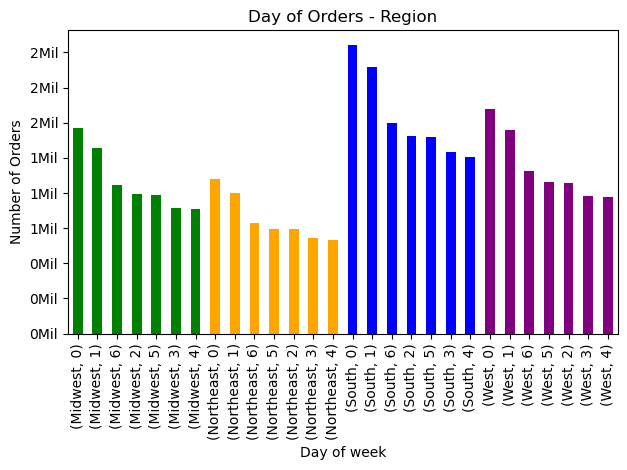

In [53]:
bar_dow_region = df_ords_customers.groupby('region')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders - Region', xlabel = 'Day of week', ylabel = 'Number of Orders', color = ['green','green','green','green','green','green','green', 'orange','orange','orange','orange','orange','orange','orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple'])
plt.tight_layout()
bar_dow_region.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))

In [54]:
# Export the chart image
bar_dow_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_region.png'))

#### Order habit in the most orders in hours of the day by regions

In [55]:
df_oh_region = df_ords_customers.groupby('region')['order_hour_of_day'].value_counts()

In [56]:
# Check the top 3 ordering hours of Midwest
df_oh_region['Midwest'].head(3)

order_hour_of_day
10    647210
11    642398
15    628670
Name: count, dtype: int64

In [57]:
# Check the top 3 ordering hours of Northeast
df_oh_region['Northeast'].head(3)

order_hour_of_day
10    485320
11    483329
14    475816
Name: count, dtype: int64

In [58]:
# Check the top 3 ordering hours of South
df_oh_region['South'].head(3)

order_hour_of_day
10    924203
11    910154
14    893998
Name: count, dtype: int64

In [59]:
# Check the top 3 ordering hours of West
df_oh_region['West'].head(3)

order_hour_of_day
10    707657
11    702704
14    696113
Name: count, dtype: int64

#### Ordering habit in dept with highest amount of orders

In [60]:
# Create a dataframe to group the data by 'department_name' and 'region'
df_grouped_dep_region = df_ords_customers.groupby(['department_name', 'region']).size().unstack()

In [61]:
df_grouped_dep_region_sort = df_grouped_dep_region.sort_values(by = 'South', ascending = False)

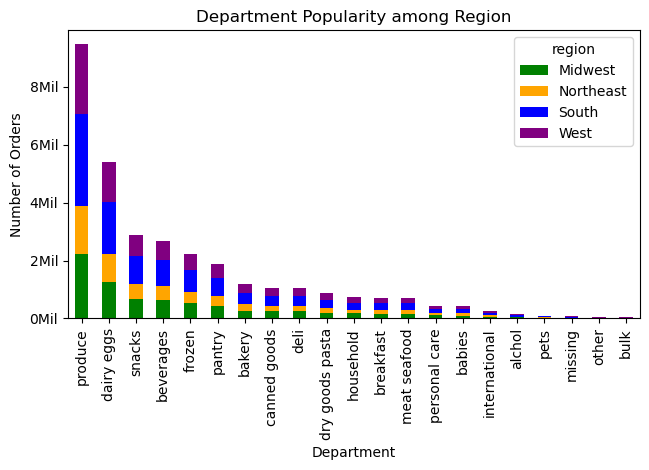

In [62]:
# Plot the data using a bar chart
colors = ['green', 'orange', 'blue', 'purple']
bar_dep_region = df_grouped_dep_region_sort.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity among Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
bar_dep_region.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))
plt.show()

In [63]:
# Export the chart image
bar_dep_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_region.png'))

#### 5.4. Connection between age and family status in terms of ordering


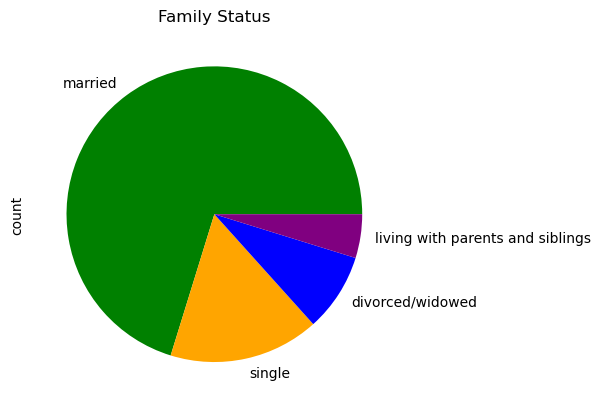

In [64]:
# Check the family status frequency
pie_fam_status = df_ords_customers['fam_status'].value_counts().plot.pie(title = 'Family Status', colors = ['green', 'orange', 'blue', 'purple'])

In [65]:
# Export the chart image
pie_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_fam_status.png'))

In [66]:
# Check the age stats for different family status
df_ords_customers.groupby('fam_status').agg({'age': ['mean', 'min', 'max']})

age        
                                       mean min max
fam_status                                         
divorced/widowed                  70.513459  60  81
living with parents and siblings  19.503663  18  21
married                           51.486328  22  81
single                            38.598412  18  59

##### Observation:
High majority of the customers are married (~70%). 

In [67]:
# Divide the customers into 3 age groups
age_bins = [18, 40, 60, float('inf')] 
age_labels = ['Young', 'Middle', 'Senior']

In [68]:
df_ords_customers['age_flag'] = np.select(
    [(df_ords_customers['age'] >= 18) & (df_ords_customers['age'] < 40), (df_ords_customers['age'] >= 40) & (df_ords_customers['age'] < 60), df_ords_customers['age'] >= 60],
    age_labels,
    default=np.nan
)

In [69]:
df_ords_customers.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,state,age,date_joined,n_dependants,fam_status,income,region,low_activity,department_name,age_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Alabama,31,2019-02-17,3,married,40423,South,False,beverages,Young
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Alabama,31,2019-02-17,3,married,40423,South,False,beverages,Young
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Alabama,31,2019-02-17,3,married,40423,South,False,beverages,Young
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Alabama,31,2019-02-17,3,married,40423,South,False,beverages,Young
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Alabama,31,2019-02-17,3,married,40423,South,False,beverages,Young


#### Ordering habit by age groups

In [70]:
df_ords_customers.groupby('age_flag')['order_number'].sum()

age_flag
Middle    174545873
Senior    189584203
Young     191854753
Name: order_number, dtype: int64

In [71]:
df_ords_customers.groupby('age_flag')['prices'].sum()

age_flag
Middle    123472816.0
Senior    130317344.0
Young     134808800.0
Name: prices, dtype: float32

#### Ordering habits by age group and family status

In [72]:
df_grouped_fam_age = df_ords_customers.groupby(['fam_status', 'age_flag']).size().unstack()

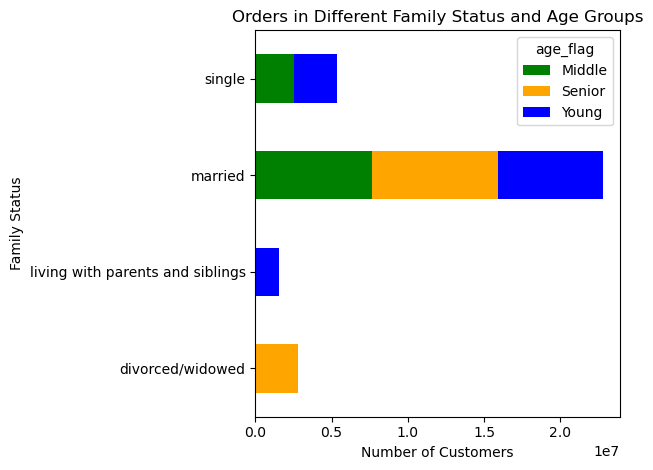

In [73]:
# Plot the data using a bar chart
colors = ['green', 'orange', 'blue']
bar_fam_age = df_grouped_fam_age.plot(kind = 'barh', stacked = True, color = colors)
plt.title('Orders in Different Family Status and Age Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Family Status')
plt.tight_layout()
plt.show()

In [74]:
# Export the chart image
bar_fam_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_age.png'))

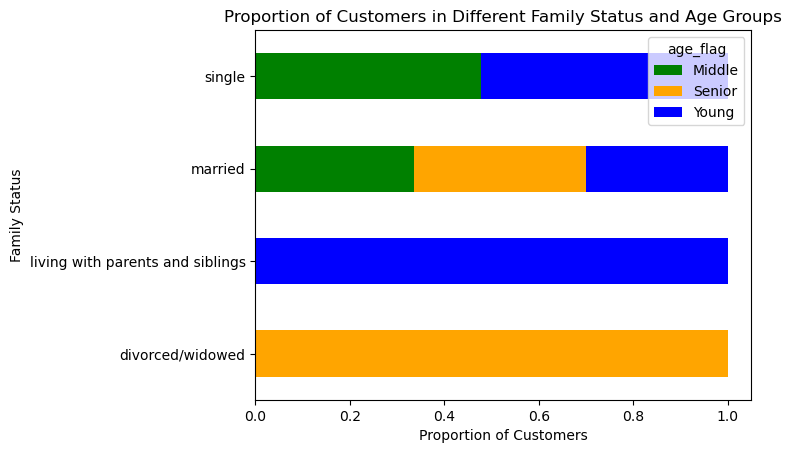

In [75]:
# To analyze the proportions 
df_prop_grouped_fam_age = df_grouped_fam_age.div(df_grouped_fam_age.sum(axis = 1), axis = 0)
bar_fam_age_prop = df_prop_grouped_fam_age.plot(kind = 'barh', stacked = True, color = colors)
plt.title('Proportion of Customers in Different Family Status and Age Groups')
plt.xlabel('Proportion of Customers')
plt.ylabel('Family Status')
plt.show()

In [76]:
# Export the chart image
bar_fam_age_prop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_age_prop.png'))

In [77]:
# Ordering habit in loyalty and age groups
# Create a dataframe to group the data by 'age_flag' and 'loyalty_flag'
df_grouped_loyal_age = df_ords_customers.groupby(['age_flag', 'loyalty_flag']).size().unstack()

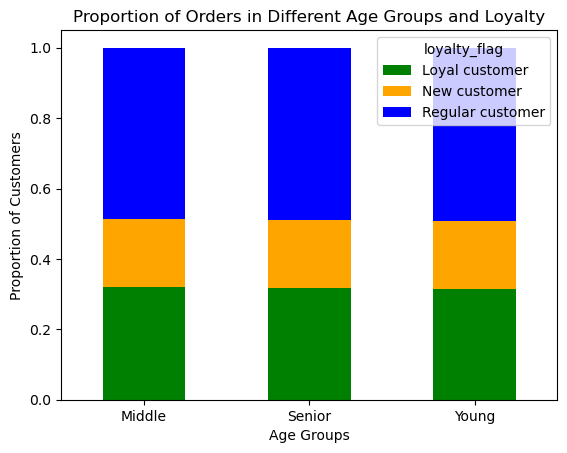

In [78]:
# To analyze the proportions in a bar chart
colors = ['green', 'orange', 'blue']
df_prop_grouped_loyal_age = df_grouped_loyal_age.div(df_grouped_loyal_age.sum(axis = 1), axis = 0)
bar_age_loyalty_prop = df_prop_grouped_loyal_age.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Proportion of Orders in Different Age Groups and Loyalty')
plt.xlabel('Age Groups')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)
plt.show()

In [79]:
# Export the chart image
bar_age_loyalty_prop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_loyalty_prop.png'))

#### 5.5. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status? 

##### income:

In [80]:
# Create a flag indicating different groups of income
df_ords_customers['income'].describe()

count    3.243421e+07
mean     9.943525e+04
std      4.305473e+04
min      2.590300e+04
25%      6.699800e+04
50%      9.661200e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64

In [81]:
# Create a new column with avg_income
df_ords_customers['avg_income'] = df_ords_customers.groupby(['user_id'])['income'].transform('mean')

In [82]:
# Create the flag based on the criteria
df_ords_customers.loc[df_ords_customers['avg_income'] > 128000, 'income_flag'] = 'High income'

C:\Users\nicol\AppData\Local\Temp\ipykernel_2764\4104041891.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'High income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ords_customers.loc[df_ords_customers['avg_income'] > 128000, 'income_flag'] = 'High income'


In [83]:
df_ords_customers.loc[(df_ords_customers['avg_income'] <= 128000) & (df_ords_customers['avg_income'] > 67000), 'income_flag'] = 'Middle income'

In [84]:
df_ords_customers.loc[df_ords_customers['avg_income'] <= 67000, 'income_flag'] = 'Low income'

In [85]:
df_ords_customers['income_flag'].value_counts(dropna = False)

income_flag
Middle income    16236394
Low income        8108594
High income       8089224
Name: count, dtype: int64

In [86]:
df_ords_customers.groupby('income_flag')['prices'].mean()

income_flag
High income      22.069101
Low income        7.296538
Middle income     9.294699
Name: prices, dtype: float32

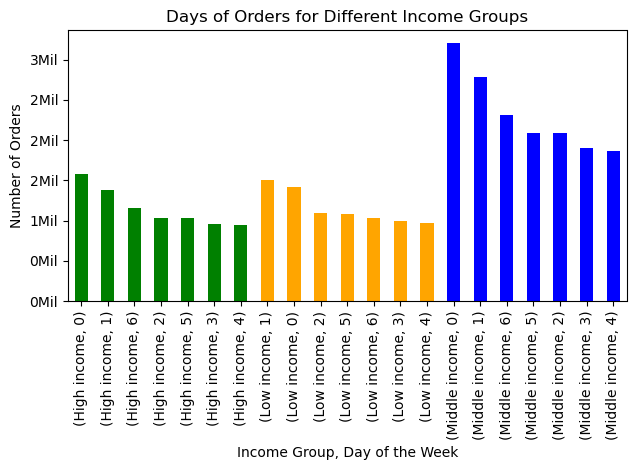

In [87]:
bar_orders_income = df_ords_customers.groupby('income_flag')['orders_day_of_week'].value_counts().plot.bar(title = 'Days of Orders for Different Income Groups', xlabel = 'Income Group, Day of the Week', ylabel = 'Number of Orders', color = ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'orange','orange','orange','orange','orange','orange','orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.tight_layout()
bar_orders_income.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))

In [88]:
# Export the chart image
bar_orders_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_income.png'))

In [89]:
# Create a depend_flag to indicate whether the customers have dependants or not
df_ords_customers['avg_dependant'] = df_ords_customers.groupby(['user_id'])['n_dependants'].transform('mean')

In [90]:
df_ords_customers.loc[df_ords_customers['avg_dependant'] > 0, 'depend_flag'] = 'With Dependants'

C:\Users\nicol\AppData\Local\Temp\ipykernel_2764\1354019646.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'With Dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ords_customers.loc[df_ords_customers['avg_dependant'] > 0, 'depend_flag'] = 'With Dependants'


In [91]:
df_ords_customers.loc[df_ords_customers['avg_dependant'] <= 0, 'depend_flag'] = 'Without Dependants'

In [92]:
df_ords_customers['depend_flag'].value_counts(dropna = False)

depend_flag
With Dependants       24329015
Without Dependants     8105197
Name: count, dtype: int64

#### 5.6. What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

#### Customer Profile: Age, Income, and Dependants

In [93]:
# Create a customer profile variable incl. age, income and dependants 
df_ords_customers['customer_profile'] = df_ords_customers['age_flag'] + '_' + df_ords_customers['income_flag'] + '_' + df_ords_customers['depend_flag'] 

#### Customer Profile - Sales

In [94]:
customer_profile_prices_sum = df_ords_customers.groupby('customer_profile')['prices'].sum()

In [95]:
customer_profile_prices_sum_sorted = customer_profile_prices_sum.sort_values(ascending=False)

In [96]:
gradient_colors = plt.cm.Greens(np.linspace(0.8, 0.3, len(customer_profile_prices_sum_sorted)))

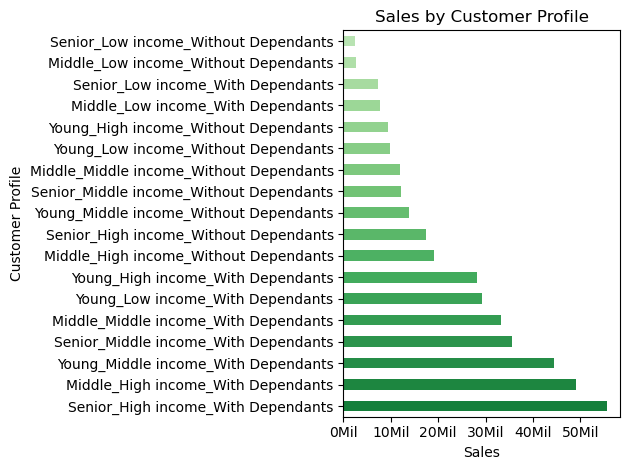

In [97]:
bar_customer_profile_sales = customer_profile_prices_sum_sorted.plot.barh(title = 'Sales by Customer Profile', xlabel = 'Sales', ylabel = 'Customer Profile', color = gradient_colors)
plt.tight_layout()
bar_customer_profile_sales.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y,pos: format(y/1000000,'1.0f')+'Mil'))

In [98]:
# Export the chart image
bar_customer_profile_sales.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_sales.png'))

#### Customer Profile - Orders Interval

In [99]:
# Orders interval
customer_profile_ordint_mean = df_ords_customers.groupby('customer_profile')['days_since_last_order'].mean()

In [100]:
customer_profile_ordint_mean_sorted = customer_profile_ordint_mean.sort_values(ascending=True)

In [101]:
gradient_colors = plt.cm.Greens(np.linspace(0.3, 0.8, len(customer_profile_ordint_mean_sorted)))

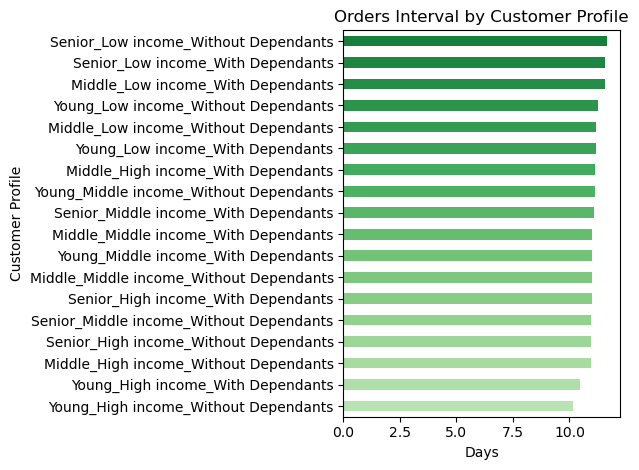

In [102]:
bar_customer_profile_orders_interval = customer_profile_ordint_mean_sorted.plot.barh(title = 'Orders Interval by Customer Profile', xlabel = 'Days', ylabel = 'Customer Profile', color = gradient_colors)
plt.tight_layout()

In [103]:
# Export the chart image
bar_customer_profile_orders_interval.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_orders_interval.png'))

#### Observations:
Dependants, high and middle income had high sales independent of age groups

In [104]:
# Select these customers using conditions
condition1 = df_ords_customers['customer_profile'] == 'Young_High income_With Dependants'
condition2 = df_ords_customers['customer_profile'] == 'Middle_High income_With Dependants'
condition3 = df_ords_customers['customer_profile'] == 'Senior_High income_With Dependants'
condition4 = df_ords_customers['customer_profile'] == 'Young_Middle income_With Dependants'
condition5 = df_ords_customers['customer_profile'] == 'Middle_Middle income_With Dependants'
condition6 = df_ords_customers['customer_profile'] == 'Senior_Middle income_With Dependants'

In [105]:
# Create a dataframe including these customers
df_customer_profile_selected = df_ords_customers[condition1 | condition2 | condition3 | condition4 | condition5 | condition6]

In [106]:
# Check the popular departments for these selected groups
df_grouped_pop_dep = df_customer_profile_selected.groupby(['department_name', 'customer_profile']).size().unstack()

In [107]:
df_grouped_pop_dep_sort = df_grouped_pop_dep.sort_values(by = 'Senior_High income_With Dependants', ascending = False)

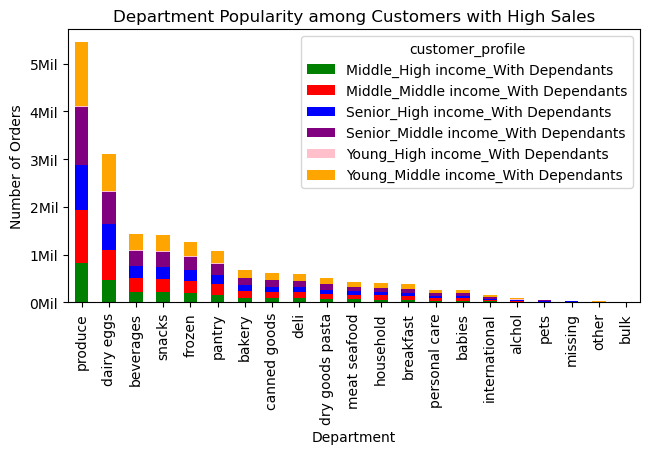

In [108]:
colors = ['green', 'red', 'blue', 'purple', 'pink', 'orange']
bar_customer_profile_pop_dep = df_grouped_pop_dep_sort.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity among Customers with High Sales')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
bar_customer_profile_pop_dep.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))
plt.show()

In [109]:
# Export the chart image
bar_customer_profile_pop_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_pop_dep.png'))

### Key Questions:
Are particular times of the day when people spend the most money?

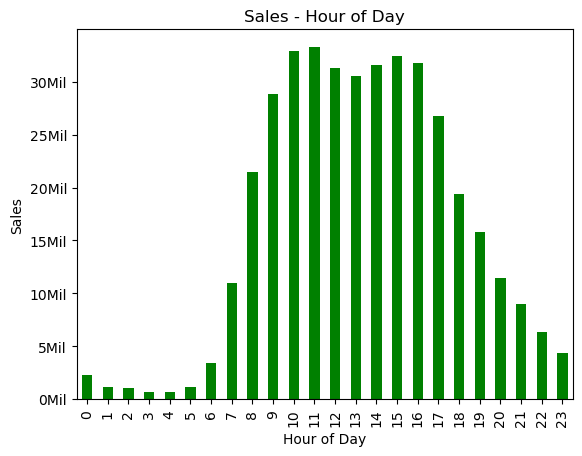

In [110]:
bar_sales_hod = df_ords_customers.groupby('order_hour_of_day')['prices'].sum().plot.bar(title = 'Sales - Hour of Day', xlabel = 'Hour of Day', ylabel = 'Sales', color = 'green')
bar_sales_hod.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))


In [111]:
# Export the chart image
bar_sales_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_hod.png'))

#### Price range groupings

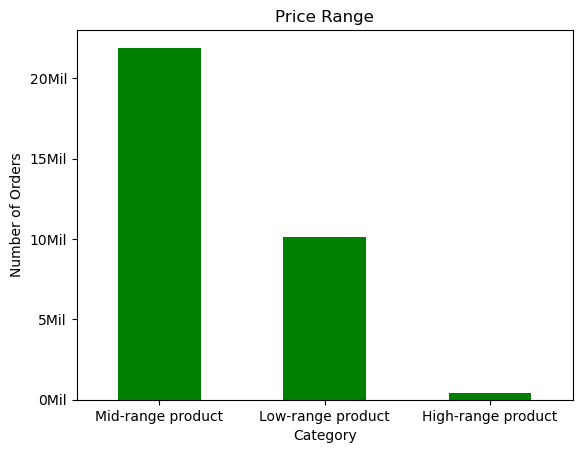

In [112]:
bar_price_range = df_ords_customers['price_range_loc'].value_counts(dropna = False).plot.bar(title = 'Price Range', xlabel = 'Category', ylabel = 'Number of Orders', color = 'green')
plt.xticks(rotation=0)
bar_price_range.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))

In [113]:
# Export the chart image
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

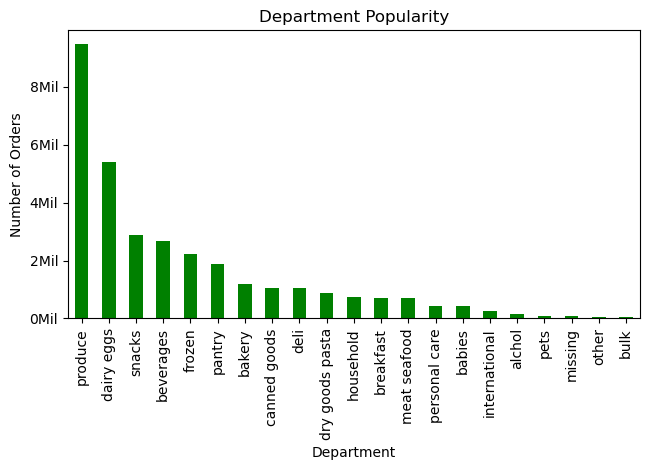

In [114]:
bar_depart_pop = df_ords_customers['department_name'].value_counts(dropna = False).plot.bar(title = 'Department Popularity', xlabel = 'Department', ylabel = 'Number of Orders', color = 'green')
plt.tight_layout()
bar_depart_pop.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))


In [115]:
# Export the chart image
bar_depart_pop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_depart_pop.png'))

In [116]:
# Export the final file
df_ords_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))